In [19]:
# Instacart Market Basket Analysis - EDA
# Notebook: 01_eda.ipynb
# Amaç: Veri setini tanımak, yapısını görmek ve ilk gözlemler

# Bu defterde:
# - Veri yükleme
# - İlk bakış (shape, kolonlar, dtypes)
# - Reorder davranışına dair temel gözlemler
# - Zamanlama ve ürün dağılımlarına kısa giriş


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# uyarıları kapatıyoruz (EDA sırasında gereksiz mesajlar görmemek ve çıktıların temiz olması için)
#ilk ML projelerimde bu hataları tekrarlarca llm'lere sora sora hatayı almamak için gerekli satırları öğrenmişim.. :)
warnings.filterwarnings("ignore")

# Grafik ayarları
sns.set(style="whitegrid")

# Veri yolları
DATA_RAW = Path("../data/raw")
FIGURES = Path("../figures")
FIGURES.mkdir(parents=True, exist_ok=True)


print("kütüphaneler yüklendi")



kütüphaneler yüklendi


In [47]:
#indirilen datasetin; CSV dosyalarını ekliyoruz.

orders= pd.read_csv(DATA_RAW/"orders.csv")
products=pd.read_csv(DATA_RAW/"products.csv")
aisles=pd.read_csv(DATA_RAW/"aisles.csv")
departments=pd.read_csv(DATA_RAW/"departments.csv")
order_products_prior=pd.read_csv(DATA_RAW/"order_products__prior.csv")
order_products_train=pd.read_csv(DATA_RAW/"order_products__train.csv")

#tablo boyutları ve ilk eda

print("siparişler:", orders.shape)
print("ürünler:",products.shape)
print("Reyon / koridor",aisles.shape)
print("Departmanlar",departments.shape)
print("Geçmiş sipariş ürünleri:",order_products_prior.shape)
print("Train sipariş ürünleri:", order_products_train.shape)

siparişler: (3421083, 7)
ürünler: (49688, 4)
Reyon / koridor (134, 2)
Departmanlar (21, 2)
Geçmiş sipariş ürünleri: (32434489, 4)
Train sipariş ürünleri: (1384617, 4)


In [22]:
#orders tablosu inceleme: 

print("Kolonlar//")
print(orders.columns.to_list())

orders.head()



Kolonlar//
['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [46]:

print("Veri tipleri")
print(orders.dtypes)

print("\nNaN değer kontrolü")
print(orders.isna().sum())

Veri tipleri
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

NaN değer kontrolü
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


#days_since_prior_order    206209 eksik // önemli detay

In [24]:

print("Temel Sayısal Bilgiler")
print("Toplam sipariş sayısı:", orders["order_id"].nunique())
print("Toplam kullanıcı sayısı:", orders["user_id"].nunique())

print("\nEval_set dağılımı:")
print(orders["eval_set"].value_counts())

Temel Sayısal Bilgiler
Toplam sipariş sayısı: 3421083
Toplam kullanıcı sayısı: 206209

Eval_set dağılımı:
eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64


In [ ]:

print("Haftanın gunüne göre sipariş dağılımı")
print(orders["order_dow"].value_counts().sort_index())

print("\nGünün saatine göre sipariş dağılımı ")
print(orders["order_hour_of_day"].describe())

print("\n Siparişler arası gü n (days_since_prior_order) ")
print(orders["days_since_prior_order"].describe())

Haftanın gunüne göre sipariş dağılımı
order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: count, dtype: int64

Günün saatine göre sipariş dağılımı 
count    3.421083e+06
mean     1.345202e+01
std      4.226088e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

 Siparişler arası gü n (days_since_prior_order) 
count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64


En yoğun günler: pazar ve pazartesi, haftalık ihtiyaç yenileme günleriyle uyumlu bir sonuç  
sipariş dağılımı: yoğun sipariş saatleri  13.00 ile 16.00 en geç sipariş 23.00'da en erken 00.00'da oluyor  
sipariş arası gün: birçok kullanıcı 3-7 gün arasında tekrar sipariş veriyor   
days_since_prior_order: önceki siparişten kaç gün geçtiği tekrar satın alma davranışı için kritik  



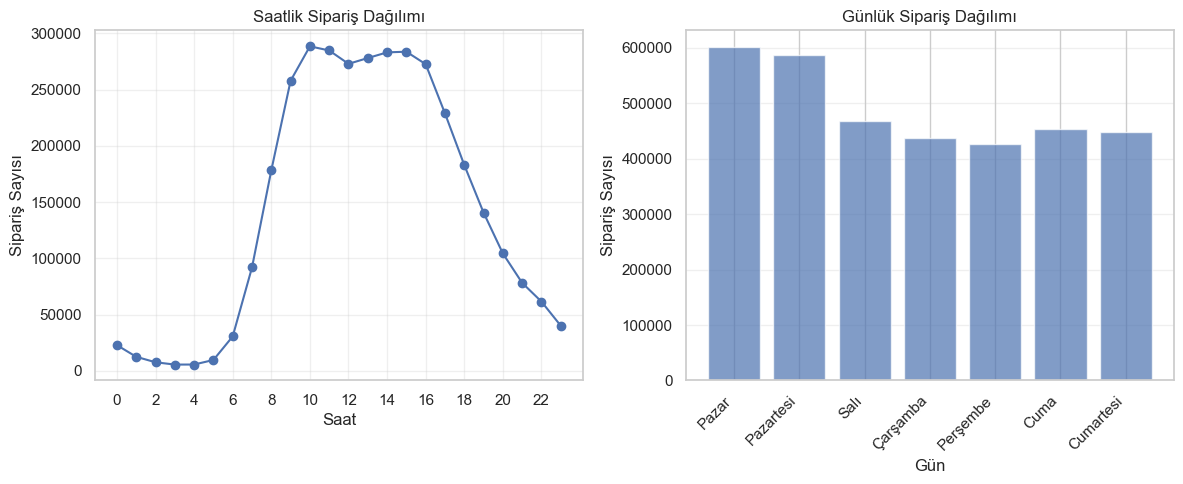

Grafik kaydedildi → figures/orders_temporal_distribution.png


In [51]:
#saatlik sipariş dağılımı

plt.figure(figsize=(12,5))

hour_dist = (
    orders['order_hour_of_day']
    .value_counts()
    .sort_index()
)

#hata çözüm: index objectleri int'e çevirme

hour_dist.index = hour_dist.index.astype(int)

plt.subplot(1,2,1)
plt.plot(hour_dist.index, hour_dist.values, marker='o')
plt.title("Saatlik Sipariş Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Sipariş Sayısı")
plt.grid(alpha=0.3)
plt.xticks(range(0,24,2))

dow_dist = (
    orders['order_dow']
    .value_counts()
    .sort_index()
)

day_names = ['Pazar', 'Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi']

plt.subplot(1,2,2)
plt.bar(dow_dist.index, dow_dist.values, alpha=0.7)
plt.title("Günlük Sipariş Dağılımı")
plt.xlabel("Gün")
plt.ylabel("Sipariş Sayısı")
plt.xticks(range(7), day_names, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES / 'orders_temporal_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafik kaydedildi → figures/orders_temporal_distribution.png")



gün içi sipariş yoğunluğu sabah 10:00’da başlıyor ve 15:00’e kadar pik yapıyor.  
gece 01:00–04:00 arası belirgin düşüş var.  
en erken sipariş 06:00 civarı, en geç sipariş 00:00’da görülüyor.  

haftanın günlerinde pazar ve pazartesi en yoğun günler.  
perşembe nispeten daha düşük hacme sahip.

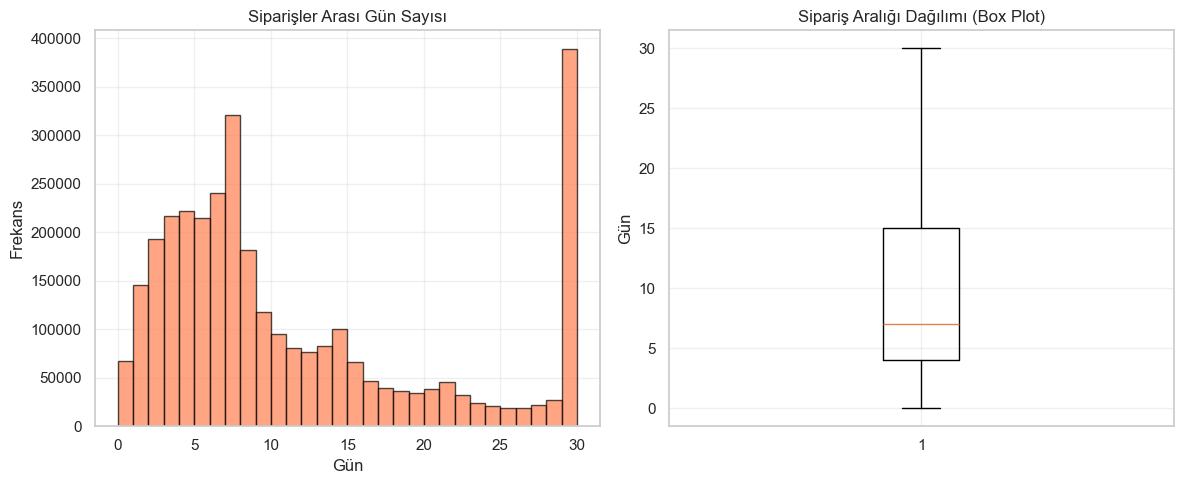

Grafik kaydedildi → figures/orders_days_since_prior.png


In [52]:
# Sipariş gün  aralıkları 

plt.figure(figsize=(12,5))

# NaN değerler ilk sipariş olduğundan histogramdan siliyoruz
intervals = orders['days_since_prior_order'].dropna()

# Histogram
plt.subplot(1,2,1)
plt.hist(intervals, bins=30, color='coral', edgecolor='black', alpha=0.7)
plt.title("Siparişler Arası Gün Sayısı")
plt.xlabel("Gün")
plt.ylabel("Frekans")
plt.grid(alpha=0.3)

# Box plot
plt.subplot(1,2,2)
plt.boxplot(intervals, vert=True)
plt.title("Sipariş Aralığı Dağılımı (Box Plot)")
plt.ylabel("Gün")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES / 'orders_days_since_prior.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafik kaydedildi → figures/orders_days_since_prior.png")


histogramda: kullanıcıların en sık sipariş verdiği aralık 3–10 gün arasında  
ilk 2 gün içinde tekrarlayan sipariş oranı yüksek  
30. gün tepe noktası çok yüksek, bu da çoğu kullanıcının aylık alışveriş döngüsüne sahip olduğunu gösteriyor  
10–30 gün aralığındaki kullanıcılar ihtiyaç durumuna göre satın alım yapıyor  
ay ortasındaki küçük peak normal varyasyon gibi değerlendirilebilir  

boxplot’ta:  
0. günde sipariş veren kullanıcılar var
haftada bir sipariş veren kullanıcı sayısı fazla , median  7 gün
4–15 gün arası yoğunluk bariz, kullanıcıların çoğu bu aralıkta
30. günde tekrar sipariş veren kitle aylık alışveriş yapan segmenti oluşturuyor.

In [ ]:
print("PRODUCTS TABLOSU")
print("="*60)

print("Kolonlar//")
print(products.columns.tolist())

print("\nİlk 5 satır//")
display(products.head())

print("\nVeri Tipleri//")
print(products.dtypes)

print("\nEksik Değer Kontrolü//")
print(products.isna().sum())

print("\nBenzersiz Değerler//")
print("Ürün sayısı:", products['product_id'].nunique())
print("Aisle sayısı:", products['aisle_id'].nunique())
print("Department sayısı:", products['department_id'].nunique())


PRODUCTS TABLOSU
Kolonlar//
['product_id', 'product_name', 'aisle_id', 'department_id']

İlk 5 satır//


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



Veri Tipleri//
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

Eksik Değer Kontrolü//
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Benzersiz Değerler//
Ürün sayısı: 49688
Aisle sayısı: 134
Department sayısı: 21


ürün sayısı 49688 adet, daha önce çalıştığım verisetlerinde bu kadar zenginlik yoktu. one-hot encoding modelini kullanamam gibi.  
product_id = ana anahtar, asıl bilgi aisle_id ve department_id ilişkisinde.  
eksik değer yok, preprocessing riski düşük

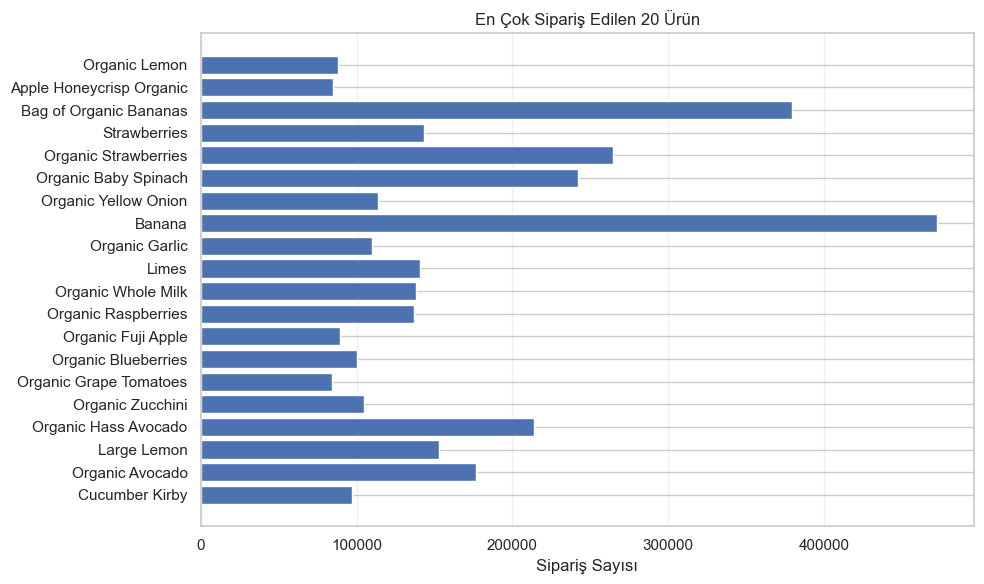

In [53]:
# En çok sipariş edilen 20 ürünü grafiklendirelim

# Ürün sipariş sayıları
product_counts = (
    order_products_prior['product_id']
    .value_counts()
    .head(20)
)

# Ürün isimleri ile birleştirelim
popular_products = products[products['product_id'].isin(product_counts.index)]
popular_products = popular_products.merge(
    product_counts.rename("siparis_sayisi"),
    left_on='product_id',
    right_index=True
)

# Grafik
plt.figure(figsize=(10,6))
plt.barh(popular_products['product_name'], popular_products['siparis_sayisi'])
plt.xlabel("Sipariş Sayısı")
plt.title("En Çok Sipariş Edilen 20 Ürün")
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES / "products_top20.png", dpi=300, bbox_inches='tight')
plt.show()


en çok satın alınan 20 ürün meyve-sebze ve taze gıdalar ağırlıklı, organik ürünlere talep yüksek  
muz en çok satılan ürün, kullanıcılar düzenli olarak temel ihtiyaç alışverişi yaptığını gösteriyor  
department/aisle bazlı FE üretimi düşünülmeli, modelleme aşamasında ürün kategorisi, department_id, aisle_id çok değerli olacak



In [35]:
print("AISLES TABLOSU")
print("="*60)

print("Kolonlar//")
print(aisles.columns.tolist())

print("\nİlk 5 satır//")
display(aisles.head())

print("\nVeri Tipleri//")
print(aisles.dtypes)

print("\nEksik Değer Kontrolü//")
print(aisles.isna().sum())

print("\nAisle sayısı:", aisles['aisle_id'].nunique())


AISLES TABLOSU
Kolonlar//
['aisle_id', 'aisle']

İlk 5 satır//


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



Veri Tipleri//
aisle_id     int64
aisle       object
dtype: object

Eksik Değer Kontrolü//
aisle_id    0
aisle       0
dtype: int64

Aisle sayısı: 134


134 farklı raf kategorisi var, aisle_id üzerinden kategori bazlı özellik üretilebilir  
eksik veri yok  
kullanıcıların aynı kategoriden tekrarlaya / adet olarak siparişi FE olarak kullanılabilir


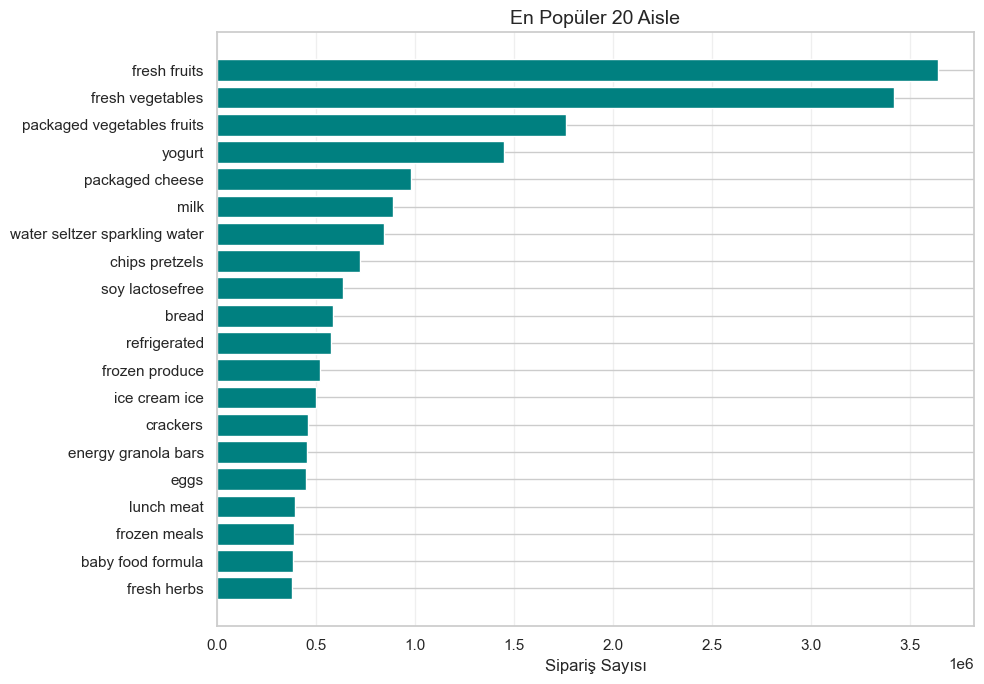

In [54]:
# Aisle bazında sipariş sayısı
merged = order_products_prior.merge(products[['product_id', 'aisle_id']], on='product_id')

aisle_counts = (
    merged['aisle_id']
    .value_counts()
    .head(20)
)

# Aisle isimleriyle eşleştir
top_aisles = aisles.set_index('aisle_id').loc[aisle_counts.index]

# Grafik
plt.figure(figsize=(10,7))
plt.barh(top_aisles['aisle'], aisle_counts.values, color='teal')
plt.title("En Popüler 20 Aisle", fontsize=14)
plt.xlabel("Sipariş Sayısı")
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(FIGURES / "aisles_top20.png", dpi=300)
plt.show()


En çok sipariş edilen raf kategorileri ağırlıklı olarak taze meyve-sebze, süt ürünleri ve dondurulmuş gıdalar  
“Fresh vegetables”, “fresh fruits”, “packaged vegetables fruits” gibi kategoriler, Instacart kullanıcılarının günlük taze ürün alışveriş rutini olduğunu gösteriyor  
Organik ürünlerde olduğu gibi, taze ürün kategorileri reorder davranışının yüksek olduğu alanlar olabilir.  


In [36]:
print("DEPARTMENTS TABLOSU")
print("="*60)

print("Kolonlar//")
print(departments.columns.tolist())

print("\nİlk 5 satır//")
display(departments.head())

print("\nVeri Tipleri//")
print(departments.dtypes)

print("\nEksik Değer Kontrolü//")
print(departments.isna().sum())

print("\nDepartment sayısı:", departments['department_id'].nunique())


DEPARTMENTS TABLOSU
Kolonlar//
['department_id', 'department']

İlk 5 satır//


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



Veri Tipleri//
department_id     int64
department       object
dtype: object

Eksik Değer Kontrolü//
department_id    0
department       0
dtype: int64

Department sayısı: 21


normal e-ticaret yapısına göre mantıklı bir tablo  
departman bazlı reorder rate hesaplanabilir  


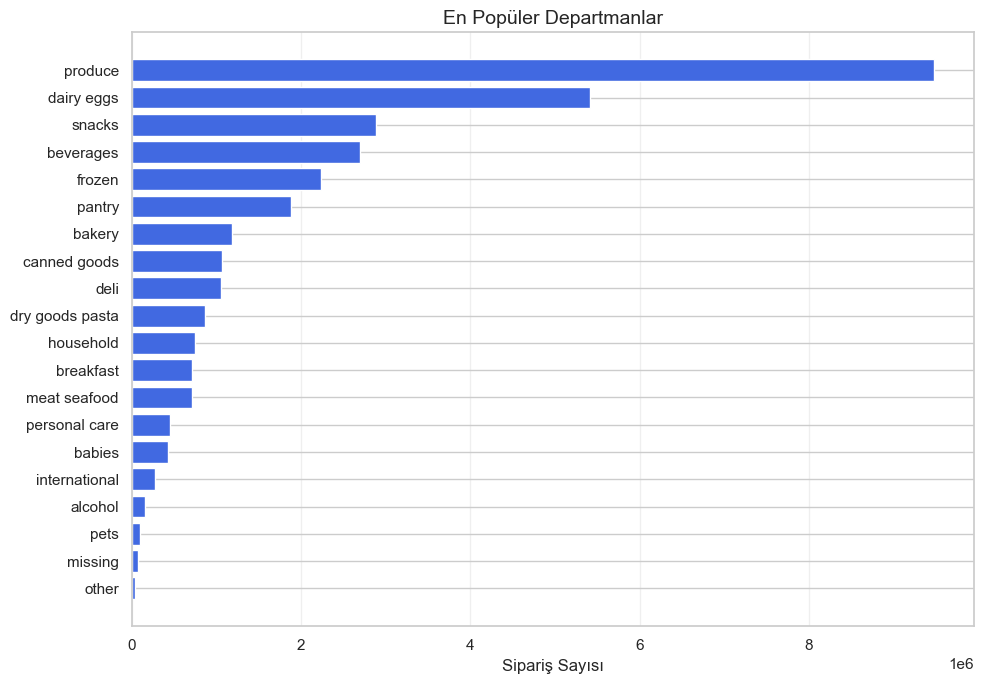

In [55]:
# Department bazında sipariş sayısı

# order_products_prior --< product_id
# products --> department_id
merged = order_products_prior.merge(
    products[['product_id', 'department_id']],
    on='product_id'
)

dept_counts = (
    merged['department_id']
    .value_counts()
    .head(20)    # zaten 21 department var ama tutarlılık için head(20) bıraktım
)

# Department isimlerini eşleştir
top_departments = departments.set_index('department_id').loc[dept_counts.index]

# Grafik
plt.figure(figsize=(10,7))
plt.barh(top_departments['department'], dept_counts.values, color='royalblue')
plt.title("En Popüler Departmanlar", fontsize=14)
plt.xlabel("Sipariş Sayısı")
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(FIGURES / "departments_top20.png", dpi=300)
plt.show()


En çok sipariş “produce”, “dairy eggs”, “snacks” gibi temel gıda departmanlarından geliyor  
Kullanıcıların ağırlıklı olarak günlük–haftalık ihtiyaç ürünlerini tekrar satın aldığı görülüyor  
Moda, kişisel bakım gibi kategoriler düşük hacimde  
Modelleme aşamasında department bazlı FE (departman tekrar oranı, kullanıcı başına departman çeşitliliği vb.) çok değerli olacak

In [37]:
print("ORDER_PRODUCTS_PRIOR TABLOSU")
#bu tablo boyutu en yüksek olanı
print("="*60)

print("Kolonlar//")
print(order_products_prior.columns.tolist())

print("\nİlk 5 satır//")
display(order_products_prior.head())

print("\nVeri Tipleri//")
print(order_products_prior.dtypes)

print("\nEksik Değer Kontrolü//")
print(order_products_prior.isna().sum())

print("\nTemel İstatistikler//")
print(order_products_prior.describe())

print("\nReorder oranı//")
print(order_products_prior['reordered'].value_counts(normalize=True) * 100)


ORDER_PRODUCTS_PRIOR TABLOSU
Kolonlar//
['order_id', 'product_id', 'add_to_cart_order', 'reordered']

İlk 5 satır//


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0



Veri Tipleri//
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

Eksik Değer Kontrolü//
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Temel İstatistikler//
           order_id    product_id  add_to_cart_order     reordered
count  3.243449e+07  3.243449e+07       3.243449e+07  3.243449e+07
mean   1.710749e+06  2.557634e+04       8.351076e+00  5.896975e-01
std    9.873007e+05  1.409669e+04       7.126671e+00  4.918886e-01
min    2.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.559430e+05  1.353000e+04       3.000000e+00  0.000000e+00
50%    1.711048e+06  2.525600e+04       6.000000e+00  1.000000e+00
75%    2.565514e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421083e+06  4.968800e+04       1.450000e+02  1.000000e+00

Reorder oranı//
reordered
1    58.969747
0    41.030253
Name: proportion, dtype: float64


32.4M kıymetlimisss  
kullanıcıların geçmiş siparişlerini incelediği tablo, FE açısından verimli bi maden // dikkatli olunması gereken tablo   
reordered oranı %59, pozitif satırlar yüksek  
add_to_cart_order -- sepete en erken konulan ürünler alınması en garanti olanlardır (ihtiyaç doğrutusunda unutmamak için standart alışveriş mantığı)  
yarışmalardaki analizime istinaden: en yüksek skoru getiren FE'ler'burada    
eksik değer yok

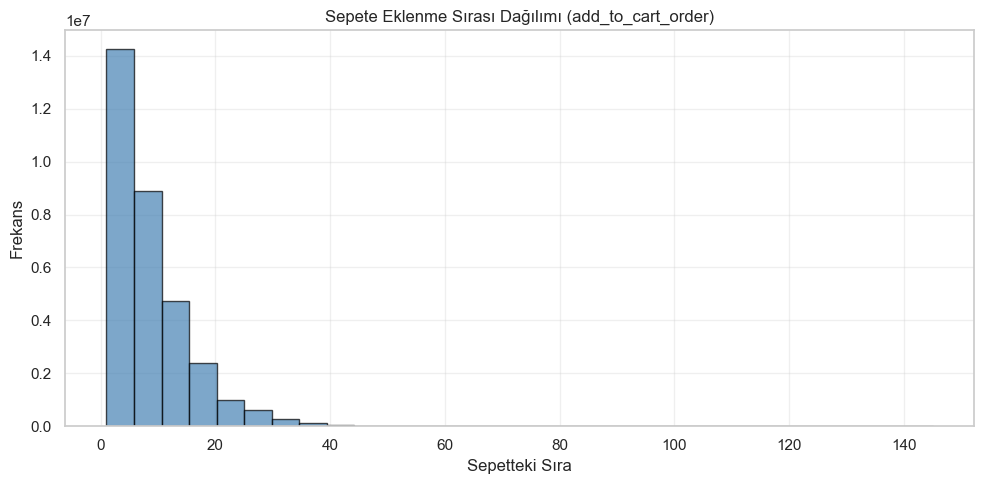

In [56]:
# ADD_TO_CART_ORDER dağılımı (Histogram)

plt.figure(figsize=(10,5))
plt.hist(order_products_prior['add_to_cart_order'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
plt.title("Sepete Eklenme Sırası Dağılımı (add_to_cart_order)")
plt.xlabel("Sepetteki Sıra")
plt.ylabel("Frekans")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(FIGURES / "cart_order_distribution.png", dpi=300)
plt.show()



Değerler 1–10 arasında yoğunlaşmış, kullanıcılar en temel ürünleri ilk sırada sepete ekliyor  
Sepet sonunda (20–40 arası) eklenen ürünler daha az, ihtiyaç anlık ürünler  
Bu değişken model için kritik: ürünün alışkanlık olarak önce mi, yoksa sonra mı alındığını gösteriyor  
Özellikle “reordered” ile birlikte feature engineering için çok değerli

In [38]:
print("ORDER_PRODUCTS_TRAIN TABLOSU")
print("="*60)

print("Kolonlar//")
print(order_products_train.columns.tolist())

print("\nİlk 5 satır//")
display(order_products_train.head())

print("\nVeri Tipleri//")
print(order_products_train.dtypes)

print("\nEksik Değer Kontrolü//")
print(order_products_train.isna().sum())

print("\nReorder oranı (Train)//")
print(order_products_train['reordered'].value_counts(normalize=True) * 100)


ORDER_PRODUCTS_TRAIN TABLOSU
Kolonlar//
['order_id', 'product_id', 'add_to_cart_order', 'reordered']

İlk 5 satır//


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1



Veri Tipleri//
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

Eksik Değer Kontrolü//
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Reorder oranı (Train)//
reordered
1    59.859441
0    40.140559
Name: proportion, dtype: float64


Reorder oranı %60 dağılım tutarlı gibi  
Train set, prior’dan daha küçük  



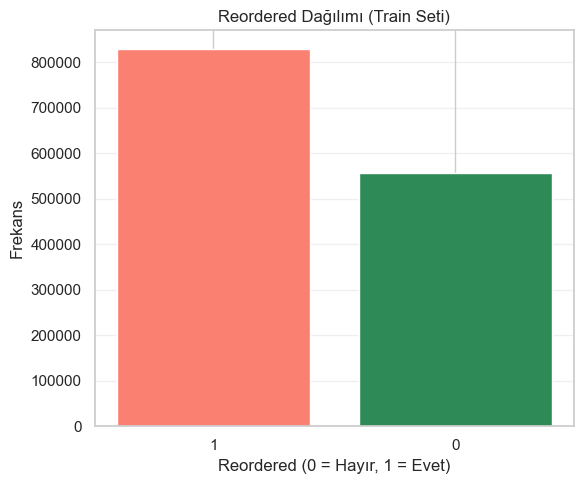

In [57]:
# Train tablosunda reorder (0/1) dağılımı

train_counts = order_products_train['reordered'].value_counts()

plt.figure(figsize=(6,5))
plt.bar(train_counts.index.astype(str), train_counts.values, color=['salmon', 'seagreen'])
plt.title("Reordered Dağılımı (Train Seti)")
plt.xlabel("Reordered (0 = Hayır, 1 = Evet)")
plt.ylabel("Frekans")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(FIGURES / "train_reordered_distribution.png", dpi=300)
plt.show()


Reordered = 1 oranı yaklaşık %60 , pozitif sınıf daha baskın  
çok ciddi bir çoğunluk sınıfın yok (model için avantaj)  
Kullanıcılar ürünlerin çoğunu tekrar satın alıyor, bu problem için davranış tabanlı feature engineering için önemli  
Accuracy kullanmak yanıltıcı olabilir, daha çok F1 / Recall odaklı değerlendirme uygun  

## EDA Özet Tablosu

##  EDA Özet Tablosu — ORDERS

| Başlık            | Değer |
|-------------------|-------|
| **Boyut**         | **3,421,083 × 7** |
| **Ana Kolonlar**  | `order_id`, `user_id`, `eval_set`, `order_number`, `order_dow`, `order_hour_of_day`, `days_since_prior_order` |
| **Eksik Değer**   | `days_since_prior_order` → **206,209 eksik** (İlk siparişlerde olması normal) |
| **Veri Yapısı**   | Temporal + kullanıcı davranışı |
| **Riskler**       | Zaman serisi açısı zayıf → siparişler birbirinden bağımsız |
| **Fırsatlar (FE)**| Kullanıcı toplam sipariş sayısı; ortalama sipariş aralığı; kullanıcı aktivite skoru; yoğun saat/gün bilgileri; recency feature; RFM benzeri davranış modelleme |
| **Not**           | En kritik “user-level” tablo. Tüm kullanıcı davranışı buradan çıkarılacak. |



## EDA Özet Tablosu

##  EDA Özet Tablosu — PRODUCTS

| Başlık            | Değer |
|-------------------|-------|
| **Boyut**         | **49,688 × 4** |
| **Ana Kolonlar**  | `product_id`, `product_name`, `aisle_id`, `department_id` |
| **Eksik Değer**   | Yok |
| **Veri Yapısı**   | Ürün kataloğu (ürün → kategori → departman hiyerarşisi) |
| **Riskler**       | `product_name` çok yüksek cardinality → NLP/embedding düşünülmezse sparse olur |
| **Fırsatlar (FE)**| Ürün seviyesinde popülerlik; tekrar satın alma oranı; kategori bazlı ürün davranışı; departman bazında FE |
| **Not**           | Bu tablo, ürün davranışlarını anlamak için temel referans noktasıdır. Ürün özelliklerini buradan zenginleteceğiz. |


## EDA Özet Tablosu

##  EDA Özet Tablosu — AISLES

| Başlık            | Değer |
|-------------------|-------|
| **Boyut**         | **134 × 2** |
| **Ana Kolonlar**  | `aisle_id`, `aisle` |
| **Eksik Değer**   | Yok |
| **Veri Yapısı**   | 134 farklı raf/alt-kategori (örn: “fresh fruits”, “yogurt”, “snacks”) |
| **Riskler**       | Çok fazla küçük kategori → One-hot encoding kullanılacaksa sparse olabilir |
| **Fırsatlar (FE)**| Kullanıcıların kategori alışkanlığı → tekrar satın alma davranışı için önemli; kategori popülerlik skorları |
| **Not**           | Ürün → Aisle → Department zincirinin orta halkası. FE üretiminde kritik role sahip. |


## EDA Özet Tablosu

##  EDA Özet Tablosu — DEPARTMENTS

| Başlık            | Değer |
|-------------------|-------|
| **Boyut**         | **21 × 2** |
| **Ana Kolonlar**  | `department_id`, `department` |
| **Eksik Değer**   | Yok |
| **Veri Yapısı**   | En üst seviye kategori (department → aisle → product) |
| **Riskler**       | Kullanıcı davranışlarını department seviyesinde yorumlamak fazla geniş olabilir |
| **Fırsatlar (FE)** | Popüler department oranları; kullanıcı department çeşitliliği; department bazlı alışkanlık |
| **Not**           | Ürün hiyerarşisinin en üst seviyesi, ürün sınıflandırma için kritik. |


## EDA Özet Tablosu

##  EDA Özet Tablosu — ORDER_PRODUCTS PRIOR

| Başlık            | Değer |
|-------------------|-------|
| **Boyut**         | **32,434,489 × 4** |
| **Ana Kolonlar**  | `order_id`, `product_id`, `add_to_cart_order`, `reordered` |
| **Eksik Değer**   | Yok |
| **Veri Yapısı**   | Kullanıcıların *geçmiş* tüm siparişleri |
| **Riskler**       | Büyük hacim → hafıza/işlem maliyeti yüksek; join işlemlerinde dikkat |
| **Fırsatlar (FE)** | Ürün tekrar satın alma oranı; kullanıcı ürün sadakati; sepette ekleme sırası (eklenme erkenliği) |
| **Not**           | En kritik FE kaynağı. Model performansının yarısı bu tablodan çıkar. |


## EDA Özet Tablosu

##  EDA Özet Tablosu — ORDER_PRODUCTS TRAIN

| Başlık            | Değer |
|-------------------|-------|
| **Boyut**         | **13,846,177 × 4** |
| **Ana Kolonlar**  | `order_id`, `product_id`, `add_to_cart_order`, `reordered` |
| **Eksik Değer**   | Yok |
| **Veri Yapısı**   | Modelin “hedef değişken” kaynağı → (reordered) |
| **Riskler**       | Target yoluyla sızıntı (data leakage) riski → dikkat edilmesi gerekir |
| **Fırsatlar (FE)** | Train içindeki reorder oranı → label distribütünü dengeli öğrenmek |
| **Not**           | Bu tablo model eğitimi için gerçek etiketleri içerir. |
